In [71]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
#IMPORTING DATASET AND VISULAIZING IT

spam_df = pd.read_csv('emails.csv')
spam_df.head(17)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [73]:
#SUMMARY OF THE DATASET

spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [74]:
#SPLITTING THE DATASET

ham = spam_df[spam_df['spam']==0]
ham.head(17)

spam = spam_df[spam_df['spam']==1]
spam.head(17)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [75]:
#CALCULATING THE PERCENTAGE OF SPAM AND HAM

print("Spam Percentage: ", (len(spam)/(len(spam_df))*100), '%')
print("Ham Percentage: ", (len(ham)/(len(spam_df))*100),'%')

Spam Percentage:  23.88268156424581 %
Ham Percentage:  76.11731843575419 %


Text(0.5, 1.0, 'Count of Spam vs Ham Emails')

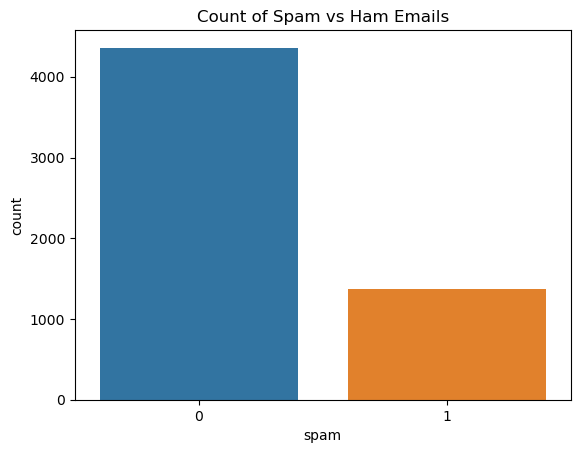

In [76]:
 #PLOTTING THE DATA

sns.countplot(x='spam', data=spam_df)
plt.title('Count of Spam vs Ham Emails')

In [77]:
#REMOVING PUNCTUATION AND STOPWORDS

import string
from nltk.corpus import stopwords

stopwords.words('english')

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

spam_df['cleaned_text']= spam_df['text'].apply(message_cleaning)
spam_df['cleaned_text'] = spam_df['cleaned_text'].apply(lambda x: ' '.join(x))

In [78]:
#COUNTVECTORIZER ON THE SPAM DATASET

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer= message_cleaning)
X = vectorizer.fit_transform(spam_df['cleaned_text'])
y = spam_df['spam'].values
print(vectorizer.get_feature_names_out())
X.toarray()


['\x01' '\x02' '\x03' ... 'zzn' 'zzncacst' 'zzzz']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
#CHECKING THE SHAPE OF THE MATRIX

print("Shape of the X matrix: ", X.shape)
print("Shape of the y vector: ", y.shape)


Shape of the X matrix:  (5728, 37229)
Shape of the y vector:  (5728,)


In [80]:
#SPLITTING THE DATASET INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [81]:
#TRAINING THE MODEL
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [82]:
#MAKING A PREDICTION

sample_email = ["Congratulations! You've won a lottery worth $1,000,000! Click here to claim your prize."]
data = vectorizer.transform(sample_email)
prediction = classifier.predict(data)
if prediction[0] == 1:
    print("The email is SPAM.")
else:
    print("The email is HAM.")


The email is SPAM.


In [83]:
#MAKING CONFUSION MATRIX AND CLASSIFICATION REPORT

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_score_train = accuracy_score(y_train, y_pred_train)

y_pred_test = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)
accuracy_score_test = accuracy_score(y_test, y_pred_test)

print("Accuracy of the model of Training set: ", accuracy_score_train)
print("Confusion Matrix of Training Set:\n", cm_train)
print("-----------------------------------------------------------------------")
print("Accuracy of the model of Test set: ", accuracy_score_test)
print("Confusion Matrix of Test Set:\n", cm_test)
print("-----------------------------------------------------------------------")
print("Classification Report of Training Set:\n", classification_report(y_train, y_pred_train))
print("-----------------------------------------------------------------------")
print("Classification Report of Test Set:\n", classification_report(y_test, y_pred_test))

Accuracy of the model of Training set:  0.99743947858473
Confusion Matrix of Training Set:
 [[3288    9]
 [   2  997]]
-----------------------------------------------------------------------
Accuracy of the model of Test set:  0.9902234636871509
Confusion Matrix of Test Set:
 [[1051   12]
 [   2  367]]
-----------------------------------------------------------------------
Classification Report of Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3297
           1       0.99      1.00      0.99       999

    accuracy                           1.00      4296
   macro avg       1.00      1.00      1.00      4296
weighted avg       1.00      1.00      1.00      4296

-----------------------------------------------------------------------
Classification Report of Test Set:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1063
           1       0.97      0.99      0

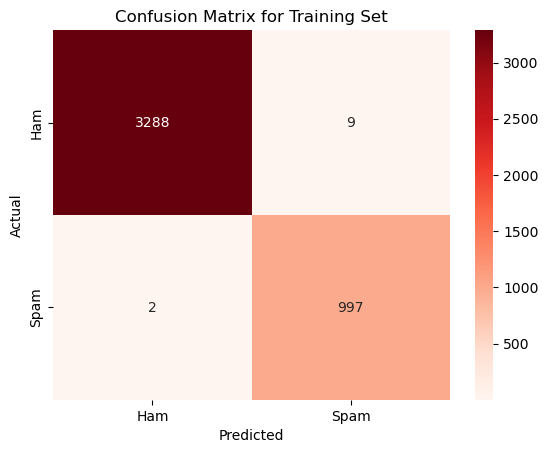

In [84]:
#VISULIZING THE CONFUSION MATRIX OF TRAINING SET

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

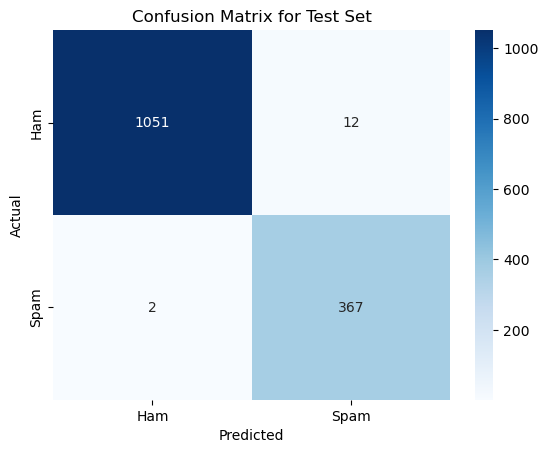

In [85]:
#VISULIZING THE CONFUSION MATRIX OF TEST SET

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()